## precision / recall

In [1]:
TP = 1
TN = 90
FN = 8
FP = 1

In [5]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.91

In [6]:
precision = TP / (TP + FP)
precision

0.5

In [8]:
recall = TP / (TP + FN)
recall

0.1111111111111111

In [12]:
beta = 1
f1 = (1 + (beta ** 2)) * (precision * recall) / (((beta ** 2) * precision) + recall)
f1

0.1818181818181818

## 9-4. threshold

In [13]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.

(150, 4)


In [14]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었습니다.

(150, 804)


In [15]:
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


In [16]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

In [17]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

In [18]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [19]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

In [20]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [23]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



In [24]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



## 9-5. PR curve

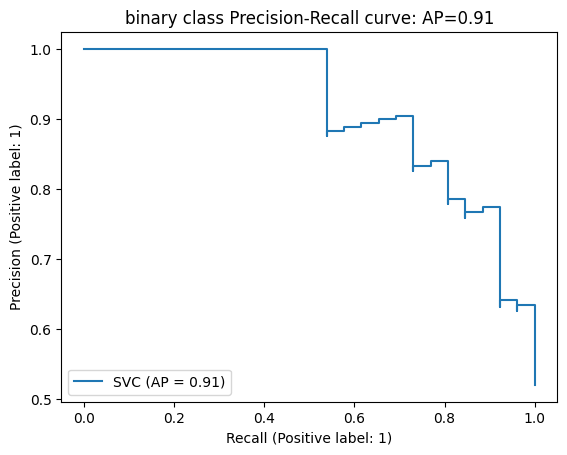

In [27]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

In [28]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


In [29]:
# Q. 모델을 SVM의 'poly' 커널을 사용하여 average_precision_score를 구하세요.
from sklearn.metrics import average_precision_score

random_state = np.random.RandomState(0)
classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

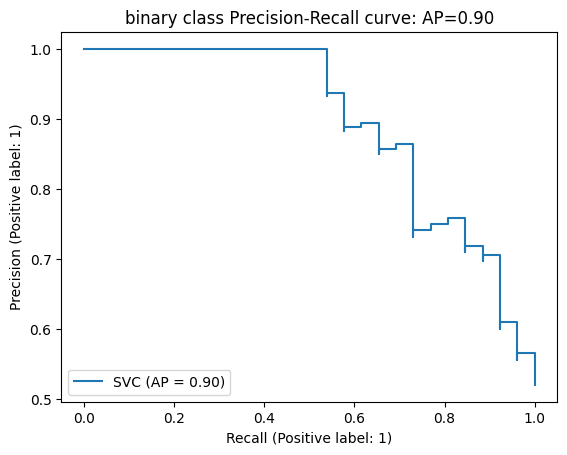

In [31]:
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## 9-6. ROC, AUC

In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("🌜    .\n·   *\n  *   *\n🌲 🐕 🌳")

🌜    .
·   *
  *   *
🌲 🐕 🌳


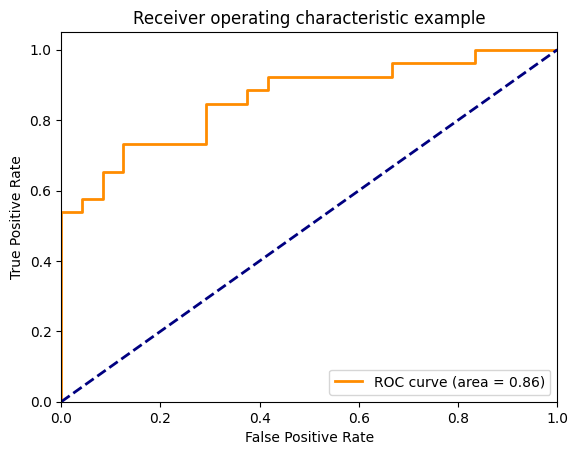

auc result:0.8605769230769231


In [34]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

In [42]:
X_train.shape

(50, 804)

In [43]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize

# Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Normalize the feature matrix
X = normalize(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute the precomputed kernel matrix
kernel_train = X_train.dot(X_train.T)
kernel_test = X_test.dot(X_train.T)

# Create an SVM classifier with 'precomputed' kernel
classifier = svm.SVC(kernel='precomputed')

# Fit the classifier using the training kernel matrix
classifier.fit(kernel_train, y_train)

# Predict using the test kernel matrix
y_pred = classifier.predict(kernel_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0


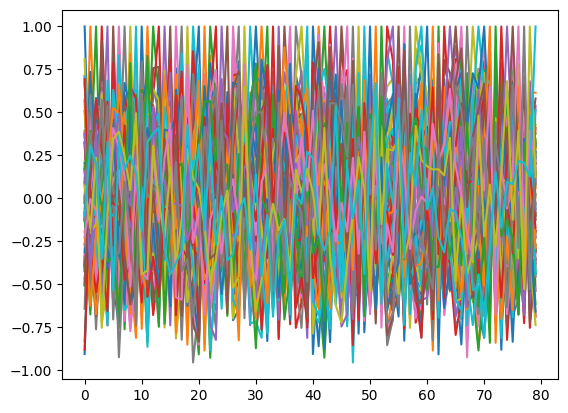

In [47]:
plt.plot(kernel_train)
plt.show()

In [45]:
kernel_train.shape

(80, 80)

In [41]:
random_state = np.random.RandomState(0)
classifier = svm.SVC(kernel='precomputed', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('avg. precision-recall score: {0:0.2f}'.format(
      average_precision))


ValueError: Precomputed matrix must be a square matrix. Input is a 50x804 matrix.

평균 precision-recall score: 0.90


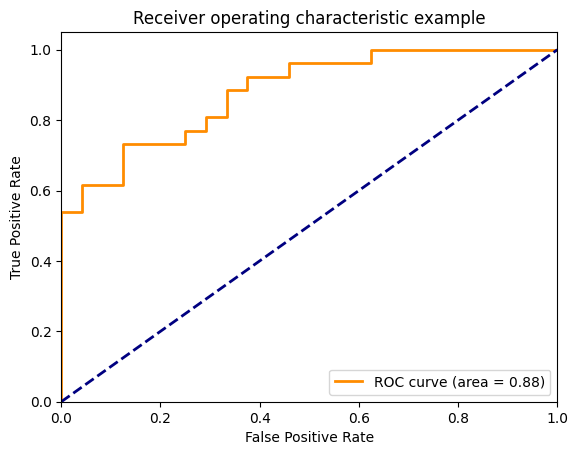

auc result:0.8798076923076923


In [39]:
# SVM 커널의 종류를 바꿔 가며 ROC 커브를 그리고 ROC AUC 값을 구하는 코드를 직접 작성해보세요.

random_state = np.random.RandomState(0)
classifier = svm.SVC(kernel='sigmoid', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")